In [ ]:
!pip install geopandas

In [ ]:
# plot 한글 깨짐 현상 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd ./drive/MyDrive/미니_프로젝트/etc/final

/content/drive/MyDrive/미니_프로젝트/etc/final


## read data

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
with open('./train_test_inference/train_data.json', "r") as json_file:
    train_data = json.load(json_file)
train_data = gpd.read_file(train_data)
train_data.drop(['id'],axis=1,inplace=True)

In [ ]:
with open('./train_test_inference/test_data.json', "r") as json_file:
    test_data = json.load(json_file)
test_data = gpd.read_file(test_data)
test_data.drop(['id'], axis=1, inplace=True)

In [ ]:
with open('./train_test_inference/inference_data_0.json', "r") as json_file:
    inference_data_0 = json.load(json_file)
inference_data_0 = gpd.read_file(inference_data_0)
inference_data_0.drop(['id'],axis=1,inplace=True)

In [ ]:
with open('./train_test_inference/inference_data_1.json', "r") as json_file:
    inference_data_1 = json.load(json_file)
inference_data_1 = gpd.read_file(inference_data_1)
inference_data_1.drop(['id'],axis=1,inplace=True)

In [ ]:
with open('./train_test_inference/inference_data_2.json', "r") as json_file:
    inference_data_2 = json.load(json_file)
inference_data_2 = gpd.read_file(inference_data_2)
inference_data_2.drop(['id'],axis=1,inplace=True)

In [ ]:
with open('./train_test_inference/inference_data_3.json', "r") as json_file:
    inference_data_3 = json.load(json_file)
inference_data_3 = gpd.read_file(inference_data_3)
inference_data_3.drop(['id'],axis=1,inplace=True)

In [ ]:
print(f'train shape: {train_data.shape}')
print(f'test shape: {test_data.shape}')
print(f'inference0 shape: {inference_data_0.shape}')
print(f'inference1 shape: {inference_data_1.shape}')
print(f'inference2 shape: {inference_data_2.shape}')
print(f'inference3 shape: {inference_data_3.shape}')

train shape: (100000, 75)
test shape: (50000, 75)
inference0 shape: (47032, 75)
inference1 shape: (47032, 75)
inference2 shape: (47032, 75)
inference3 shape: (47032, 75)


## 컬럼 list
* 101, 103, 105, 106, 107: 
* busStation: 반경 400미터 내에 버스 승강장 수
* dw_lanes_0 ~ dw_lanes_5: 
* fast_exist: 급속 충전기 설치 여부
* slow_exist: 완속 충전기 설치 여부
* taxtStation: 반경 400미터 내에 택시 승강장 수
* up_lanes_1 ~ up_lanes_6: 
* width_1 ~ width_5: 
* 개발부지: 
* 문화및집회시설: 
* 발전시설: 
* 버스: 
* 산업단지거리: 
* 상하수도및가스시설: 
* 숙박시설: 
* 승용차: 
* 업무시설: 
* 완속: 
* 운수시설: 
* 위락시설:
* 위험물저장시설: 
* 유원지: 
* 의료시설: 
* 인구: 
* 자동차관련시설: 
* 장례식장: 
* 전기차: 
* 종교시설: 
* 주거지: 
* 주차장: 
* 차량수: 
* 창고: 
* 청소년관련시설: 
* 체력증진시설: 
* 통신시설: 
* 편의시설: 
* 학교: 
* 혼잡빈도강도: 
* 혼잡시간강도: 
* 화물차: 
* geometry: 


In [ ]:
train_data.columns

Index(['101', '103', '105', '106', '107', 'busStation', 'dw_lanes_0',
       'dw_lanes_1', 'dw_lanes_2', 'dw_lanes_3', 'dw_lanes_4', 'dw_lanes_5',
       'fast_exist', 'slow_exist', 'taxiStation', 'up_lanes_1', 'up_lanes_2',
       'up_lanes_3', 'up_lanes_4', 'up_lanes_5', 'up_lanes_6', 'width_1',
       'width_2', 'width_3', 'width_4', 'width_5', '개발부지', '개발제한구역비율', '계획부지',
       '고도', '공공시설', '공원', '공장', '관광휴게시설', '광장', '교육연구및복지시설', '급속', '노유자시설',
       '녹지', '농축산업시설', '님비시설', '면적', '묘지관련시설', '문화및집회시설', '발전시설', '버스',
       '산업단지거리', '상하수도및가스시설', '숙박시설', '승용차', '업무시설', '완속', '운수시설', '위락시설',
       '위험물저장시설', '유원지', '의료시설', '인구', '자동차관련시설', '장례식장', '전기차', '종교시설', '주거지',
       '주차장', '차량수', '창고', '청소년관련시설', '체력증진시설', '통신시설', '편의시설', '학교', '혼잡빈도강도',
       '혼잡시간강도', '화물차', 'geometry'],
      dtype='object')

## 결측치 확인

In [ ]:
train_data.isnull().sum() # 결측치 없음

101            0
103            0
105            0
106            0
107            0
busStation     0
dw_lanes_0     0
dw_lanes_1     0
dw_lanes_2     0
dw_lanes_3     0
dw_lanes_4     0
dw_lanes_5     0
fast_exist     0
slow_exist     0
taxiStation    0
up_lanes_1     0
up_lanes_2     0
up_lanes_3     0
up_lanes_4     0
up_lanes_5     0
up_lanes_6     0
width_1        0
width_2        0
width_3        0
width_4        0
width_5        0
개발부지           0
개발제한구역비율       0
계획부지           0
고도             0
공공시설           0
공원             0
공장             0
관광휴게시설         0
광장             0
교육연구및복지시설      0
급속             0
노유자시설          0
녹지             0
농축산업시설         0
님비시설           0
면적             0
묘지관련시설         0
문화및집회시설        0
발전시설           0
버스             0
산업단지거리         0
상하수도및가스시설      0
숙박시설           0
승용차            0
업무시설           0
완속             0
운수시설           0
위락시설           0
위험물저장시설        0
유원지            0
의료시설           0
인구             0
자동차관련시설       

## 고도가 150m 넘는 샘플 제거

In [ ]:
train_data = train_data[train_data.고도<150]
test_data = test_data[test_data.고도<150]
inference_data_0 = inference_data_0[inference_data_0.고도<150]
inference_data_1 = inference_data_1[inference_data_1.고도<150]
inference_data_2 = inference_data_2[inference_data_2.고도<150]
inference_data_3 = inference_data_3[inference_data_3.고도<150]

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(inference_data_0.shape)
print(inference_data_1.shape)
print(inference_data_2.shape)
print(inference_data_3.shape)

(51206, 75)
(25575, 75)
(24275, 75)
(24068, 75)
(24015, 75)
(24221, 75)


In [ ]:
Train = train_data.drop(['geometry','101','103','105','106','107'],axis=1)
# Train = train_data.drop(['geometry'],axis=1)

Test = test_data.drop(['geometry','101','103','105','106','107'],axis=1)
# Test = test_data.drop(['geometry'],axis=1)

Inference0 = inference_data_0.drop(['101','103','105','106','107'],axis=1)
Inference1 = inference_data_1.drop(['101','103','105','106','107'],axis=1)
Inference2 = inference_data_2.drop(['101','103','105','106','107'],axis=1)
Inference3 = inference_data_3.drop(['101','103','105','106','107'],axis=1)

* inference를 fast와 slow로 나눔
* 각 데이터셋은 미설치된 지역만 있어야 함



In [ ]:
Inference0_fast = Inference0[Inference0.fast_exist==0]
Inference1_fast = Inference1[Inference1.fast_exist==0]
Inference2_fast = Inference2[Inference2.fast_exist==0]
Inference3_fast = Inference3[Inference3.fast_exist==0]

Inference0_slow = Inference0[Inference0.slow_exist==0]
Inference1_slow = Inference1[Inference1.slow_exist==0]
Inference2_slow = Inference2[Inference2.slow_exist==0]
Inference3_slow = Inference3[Inference3.slow_exist==0]

In [ ]:
Train_columns = Train.columns
Test_columns = Test.columns
Inference0_columns = Inference0.columns
Inference1_columns = Inference1.columns
Inference2_columns = Inference2.columns
Inference3_columns = Inference3.columns

## X, y 지정

In [ ]:
X_train_fast = Train.drop(['fast_exist', 'slow_exist'], axis=1)
X_test_fast = Test.drop(['fast_exist', 'slow_exist'], axis=1)
X_inference0_fast = Inference0_fast.drop(['fast_exist', 'slow_exist', 'geometry'], axis=1)
X_inference1_fast = Inference1_fast.drop(['fast_exist', 'slow_exist', 'geometry'], axis=1)
X_inference2_fast = Inference2_fast.drop(['fast_exist', 'slow_exist', 'geometry'], axis=1)
X_inference3_fast = Inference3_fast.drop(['fast_exist', 'slow_exist', 'geometry'], axis=1)

X_train_slow = Train.drop(['fast_exist', 'slow_exist'], axis=1)
X_test_slow = Test.drop(['fast_exist', 'slow_exist'], axis=1)
X_inference0_slow = Inference0_slow.drop(['fast_exist', 'slow_exist', 'geometry'], axis=1)
X_inference1_slow = Inference1_slow.drop(['fast_exist', 'slow_exist', 'geometry'], axis=1)
X_inference2_slow = Inference2_slow.drop(['fast_exist', 'slow_exist', 'geometry'], axis=1)
X_inference3_slow = Inference3_slow.drop(['fast_exist', 'slow_exist', 'geometry'], axis=1)

y_train_fast = Train['fast_exist'].values
y_test_fast = Test['fast_exist'].values
y_inference0_fast = Inference0_fast['geometry'].values
y_inference1_fast = Inference1_fast['geometry'].values
y_inference2_fast = Inference2_fast['geometry'].values
y_inference3_fast = Inference3_fast['geometry'].values

y_train_slow = Train['slow_exist'].values
y_test_slow = Test['slow_exist'].values
y_inference0_slow = Inference0_slow['geometry'].values
y_inference1_slow = Inference1_slow['geometry'].values
y_inference2_slow = Inference2_slow['geometry'].values
y_inference3_slow = Inference3_slow['geometry'].values

## train dataset의 target balance
* 심한 imbalance를 가지고 있음
* SMOTE를 이용하여 해결

In [ ]:
len(Train[Train['fast_exist']==0])

51158

In [ ]:
len(Train[Train['fast_exist']==1])

48

In [ ]:
smote = SMOTE(n_jobs=-1)

In [ ]:
X_train_fast_smote, y_train_fast_smote = smote.fit_resample(X_train_fast,y_train_fast)
X_train_slow_smote, y_train_slow_smote = smote.fit_resample(X_train_slow,y_train_slow)

In [ ]:
X_train_fast_smote = pd.DataFrame(X_train_fast_smote, columns = X_train_fast.columns)
X_train_slow_smote = pd.DataFrame(X_train_slow_smote, columns = X_train_slow.columns)

In [ ]:
len(y_train_fast_smote[y_train_fast_smote==1])

51158

In [ ]:
len(y_train_fast_smote[y_train_fast_smote==0])

51158

In [ ]:
len(y_train_slow_smote[y_train_slow_smote==1])

51147

In [ ]:
len(y_train_slow_smote[y_train_slow_smote==0])

51147

## feature type 확인
* 모든 변수를 numeric variable로 판단해도 무방할 듯 함!

In [ ]:
for i in list(Train_columns):
    print(f'{i} : {Train[i].unique()}')

busStation : [ 2  0  1  4  3  8  9  5  6 12  7 11 21 14 13 16 17 20 10 15 18 19 22 23]
dw_lanes_0 : [ 4  6 43  0  2 10 39 13  1  3  8 19 16  7 24 22 32 30 28  5 17 12 21 27
  9 14 38 62 25 11 26 29 18 37 23 36 46 20 64 31 15 33 35 72 60 50 48 45
 52 61 71 55 40 51 34 81 79 65 42 44 41 63 68 56 80 49 54 59 47 70 77 67
 73 58 69 66 53 57 75 78 76 82 74 84 83]
dw_lanes_1 : [  0   6   5   1   2   9  11 179  17  33  25  16   8  64  10  18  22  19
   7  14  20  90 206   4  12  65  61 116  39  77  99  41  46  75  59  76
  51  87  34  40  72  43 186  50 234  44  70  26  15 192  29 210  21  42
  23  13   3  36 154  35  32  73 165  89  37 145  27 181  24 151  82  68
  88  30  38 115 159  56 106  53 144 211  28 190  49  74 184  31  78  94
 117 247 169 164  45 132  57  58  47 171  96  91 254 167  69 127  84 202
 107 119  63  54  81 177  48  52  83 150  66  86 126 138  79  71 147 131
 194 103  62 235 122 199 125 196 225 214  60 153 146 110 173 180  80  85
 201 176  95  67  93 163 114 108 121 130 19

## 히스토그램

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ecf633c10>,
      dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_te

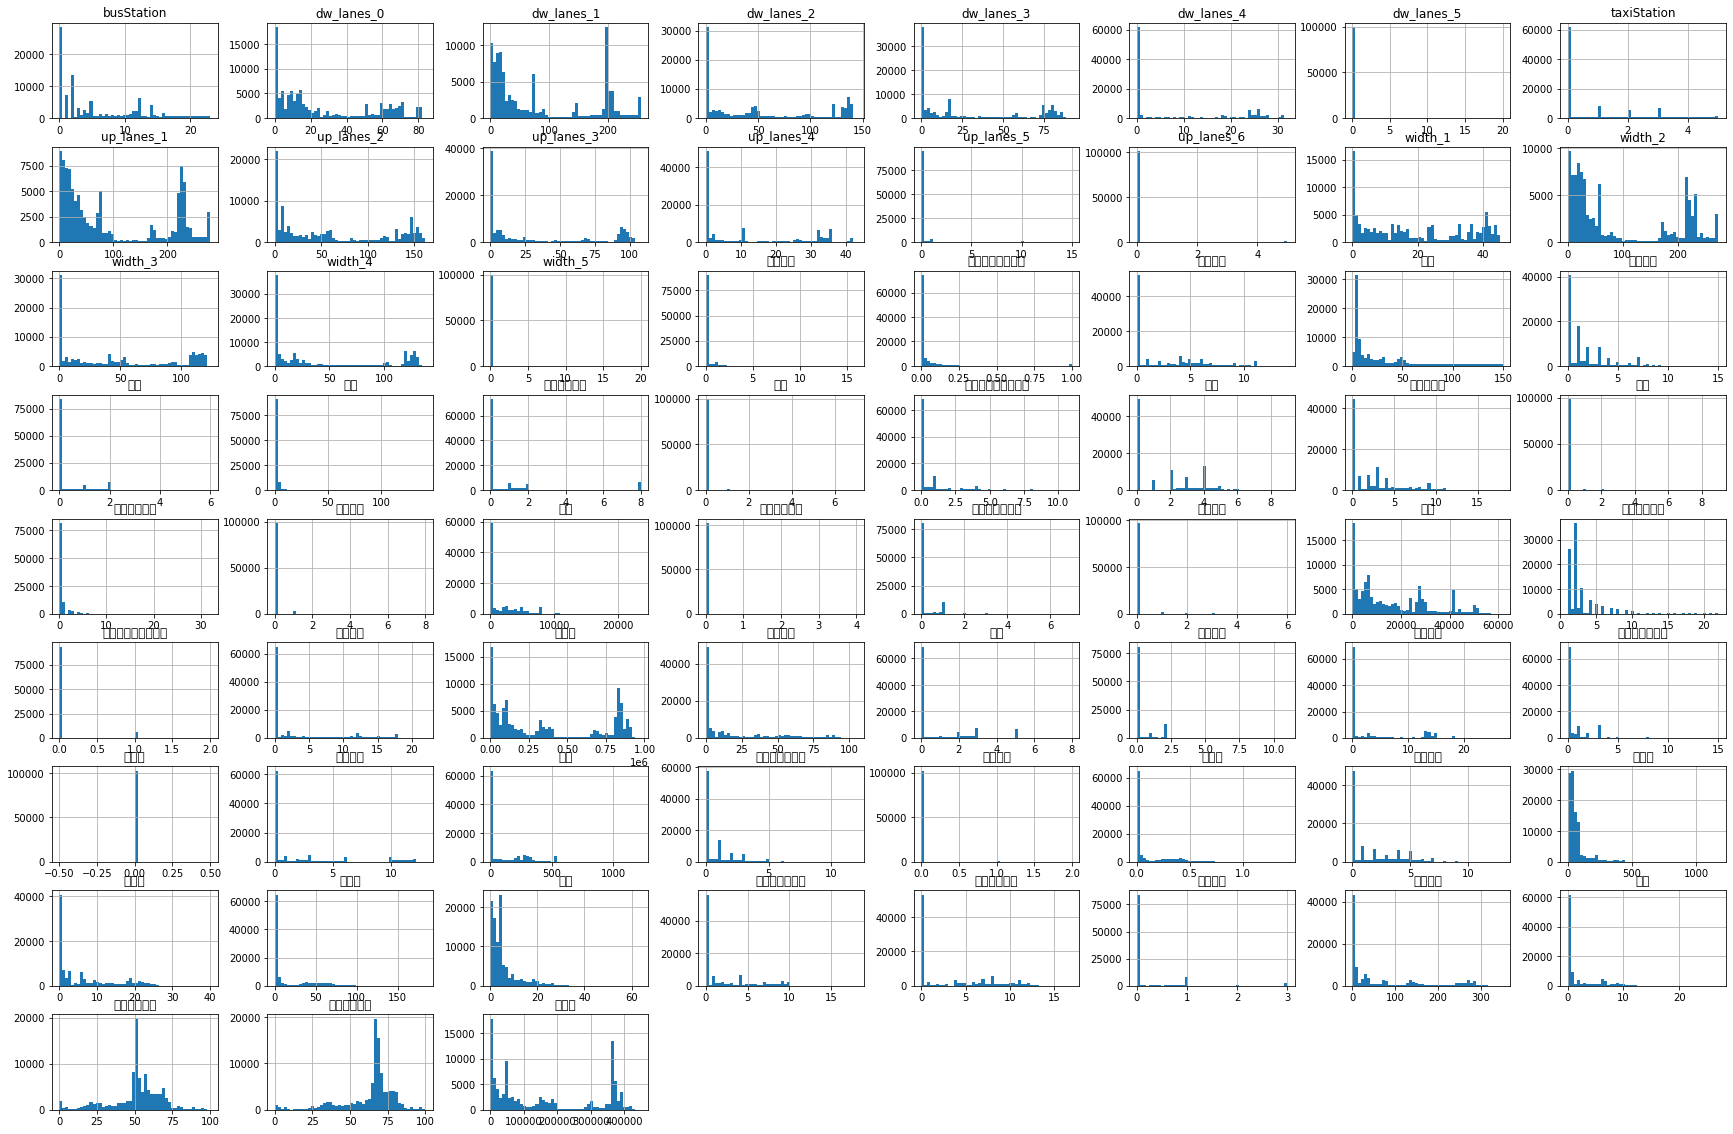

In [ ]:
X_train_fast_smote.hist(bins=50, figsize=(30, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ecea993d0>,
      dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_te

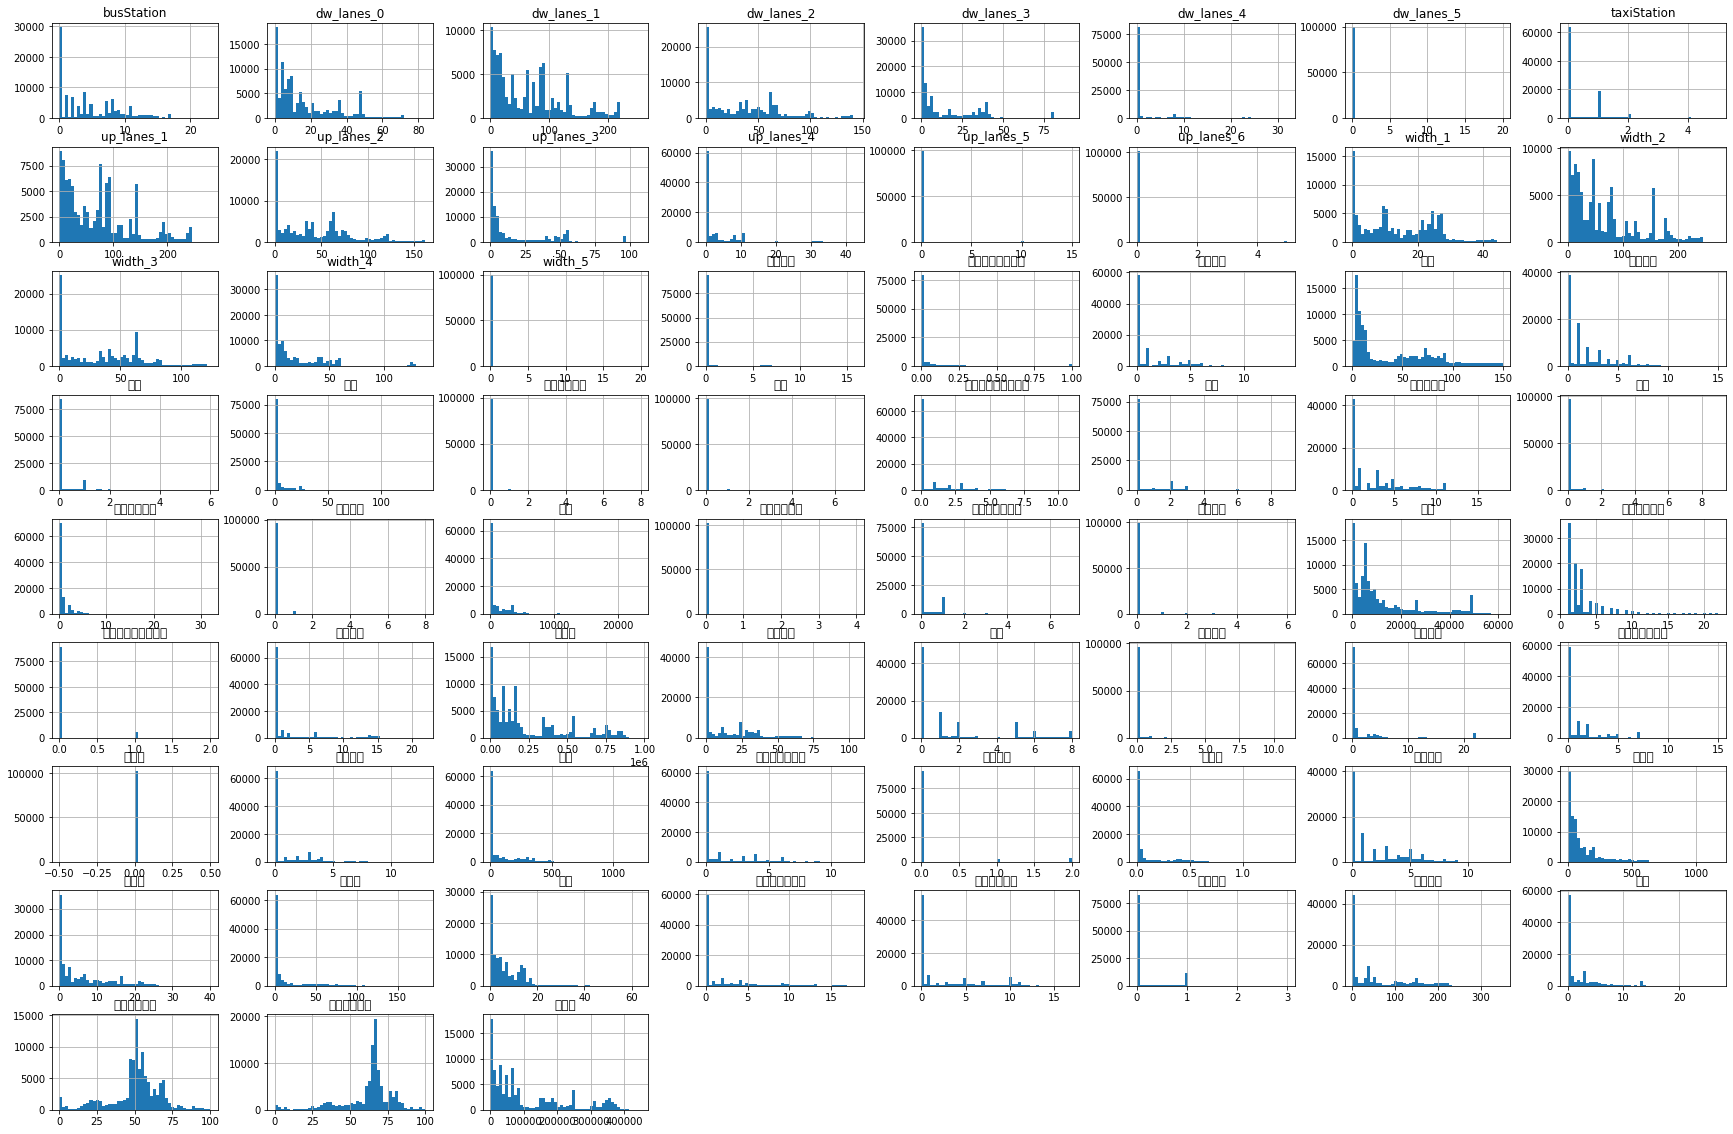

In [ ]:
X_train_slow_smote.hist(bins=50, figsize=(30, 20))

## skewness가 1보다 큰 feature를 log 변환


### 급속 충전(train)

In [ ]:
fast_imbalance_feature = []
fast_balance_feature = []
for i in list(X_train_fast_smote.columns):
    if X_train_fast_smote[i].skew()<=1:
        print(f'{i}: {X_train_fast_smote[i].skew()}')
        fast_balance_feature.append(i)
    else:
        fast_imbalance_feature.append(i)

busStation: 0.9067628518829927
dw_lanes_0: 0.7059000637718643
dw_lanes_1: 0.6262759728459244
dw_lanes_2: 0.5557855518464747
dw_lanes_3: 0.7272789822107917
dw_lanes_4: 0.8764758125796693
up_lanes_1: 0.6226256686777935
up_lanes_2: 0.5513501812455993
up_lanes_3: 0.7483270285706207
up_lanes_4: 0.8172159357452247
width_1: 0.2900371448000145
width_2: 0.6704532897954858
width_3: 0.42736274777092126
width_4: 0.7805190350069419
급속: 0.5399794711642618
버스: 0.8358276454555336
승용차: 0.4811162899577637
유원지: 0
종교시설: 0.9696858333471008
체력증진시설: 0.6868366836952514
혼잡빈도강도: -0.8276243138703612
혼잡시간강도: -1.5773765458131763
화물차: 0.44903421784674485


In [ ]:
fast_imbalance_feature

['dw_lanes_5',
 'taxiStation',
 'up_lanes_5',
 'up_lanes_6',
 'width_5',
 '개발부지',
 '개발제한구역비율',
 '계획부지',
 '고도',
 '공공시설',
 '공원',
 '공장',
 '관광휴게시설',
 '광장',
 '교육연구및복지시설',
 '노유자시설',
 '녹지',
 '농축산업시설',
 '님비시설',
 '면적',
 '묘지관련시설',
 '문화및집회시설',
 '발전시설',
 '산업단지거리',
 '상하수도및가스시설',
 '숙박시설',
 '업무시설',
 '완속',
 '운수시설',
 '위락시설',
 '위험물저장시설',
 '의료시설',
 '인구',
 '자동차관련시설',
 '장례식장',
 '전기차',
 '주거지',
 '주차장',
 '차량수',
 '창고',
 '청소년관련시설',
 '통신시설',
 '편의시설',
 '학교']

In [ ]:
for i in fast_imbalance_feature:
    A_n = np.log1p(X_train_fast_smote[i])
    X_train_fast_smote.insert(0, i+'_scaled', A_n)
    X_train_fast_smote.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_train_fast_smote['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_train_fast_smote['혼잡시간강도'])*(-1)+100)
X_train_fast_smote.insert(0, '혼잡시간강도_scaled', B_n)
X_train_fast_smote.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_train_fast_smote

,혼잡시간강도_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,고도_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,up_lanes_6_scaled,up_lanes_5_scaled,taxiStation_scaled,dw_lanes_5_scaled,busStation,dw_lanes_0,dw_lanes_1,dw_lanes_2,dw_lanes_3,dw_lanes_4,up_lanes_1,up_lanes_2,up_lanes_3,up_lanes_4,width_1,width_2,width_3,width_4,급속,버스,승용차,유원지,종교시설,체력증진시설,혼잡빈도강도,화물차
0,4.578959,0.693147,0.000000,0.0,0.000000,1.609438,0.366484,1.098612,4.094345,0.002226,0.0,0.000000,1.252763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.0,0.000000,0.0,4.008514,0.000000,0.0,0.0,0.693147,0.000000,0.0,0.000000,0.693147,0.000000,0.693147,2.412933,1.098612,0.017090,0.0,1.609438,0.000000,1.609438,0.000000,1.609438,2.000000,4.000000,0.000000,16.000000,1.0,2.000000,0.000000,20.000000,1.000000,2.0,0.000000,4.000000,16.000000,3.000000,0.0,11156.100000,58311.050000,0.0,0.000000,0.000000,0.792593,26257.900000
1,4.155390,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,1.098612,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,0.0,2.564949,1.791759,2.079442,0.000000,2.564949,0.000000,6.000000,6.000000,3.000000,12.0,15.000000,12.000000,3.000000,9.000000,18.0,10.000000,2.000000,3.000000,27.000000,0.0,15272.700000,62299.000000,0.0,0.000000,0.000000,22.757407,26628.000000
2,4.159101,0.000000,0.000000,0.0,0.000000,2.079442,0.000000,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,1.098612,0.0,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.000000,0.000000,0.0,1.386294,1.386294,0.000000,1.945910,1.609438,0.693147,0.000000,0.0,1.945910,0.000000,2.079442,0.000000,1.945910,0.000000,43.000000,5.000000,31.000000,22.0,15.000000,16.000000,49.000000,32.000000,18.0,11.000000,25.000000,40.000000,40.000000,0.0,5788.500000,166947.900000,0.0,0.000000,0.000000,21.294262,69574.300000
3,4.615121,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.916291,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,9.000000,1204.400000,0.0,0.000000,0.000000,0.000000,602.400000
4,4.543827,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.341093,0.000000,0.693147,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.0,0.000000,2.000000,0.000000,3.000000,0.0,0.000000,2.000000,0.000000,3.000000,0.0,101.350000,13338.100000,0.0,0.000000,0.000000,2.490000,5252.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102311,3.515378,2.048631,3.666541,0.0,1.014242,1.098612,3.486816,2.048631,3.785511,0.181751,0.0,0.000000,6.273820,0.000000,0.000000,0.000000,0.000000,1.386294,1.836066,0

### 급속 충전(test)

In [ ]:
for i in fast_imbalance_feature:
    A_n = np.log1p(X_test_fast[i])
    X_test_fast.insert(0, i+'_scaled', A_n)
    X_test_fast.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_test_fast['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_test_fast['혼잡시간강도'])*(-1)+100)
X_test_fast.insert(0, '혼잡시간강도_scaled', B_n)
X_test_fast.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_test_fast

,혼잡시간강도_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,고도_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,up_lanes_6_scaled,up_lanes_5_scaled,taxiStation_scaled,dw_lanes_5_scaled,busStation,dw_lanes_0,dw_lanes_1,dw_lanes_2,dw_lanes_3,dw_lanes_4,up_lanes_1,up_lanes_2,up_lanes_3,up_lanes_4,width_1,width_2,width_3,width_4,급속,버스,승용차,유원지,종교시설,체력증진시설,혼잡빈도강도,화물차
0,4.345976,0.000000,0.693147,0.0,0.000000,2.484907,0.000000,0.000000,3.871201,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.693147,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.693147,0.000000,0.045337,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3,12,6,28,6,0,14,32,6,0,8,10,28,6,0,7850.10,176313.55,0,0,0,20.296154,80311.90
1,4.588591,0.000000,0.693147,0.0,0.000000,1.791759,0.000000,0.000000,4.204693,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.0,0.000000,0.0,1.098612,0.000000,1.098612,0.000000,0.0,0.0,0.000000,0.0,0.000000,3.277145,0.000000,0.000000,0.0,1.386294,0.0,1.386294,0.000000,1.386294,1,4,0,14,3,2,0,18,3,2,0,4,14,5,0,13668.85,51940.45,0,0,0,0.548077,24163.00
2,3.536171,1.098612,1.609438,0.0,0.000000,0.693147,0.000000,0.000000,1.609438,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.098612,0.000000,0.0,1.386294,0.000000,0.693147,0.0,0.000000,0.0,0.000000,0.000000,1.098612,0.000000,0.0,0.0,0.000000,0.0,0.000000,4.675163,0.693147,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,6,62,16,14,0,55,29,3,11,10,51,23,14,0,4275.70,186271.90,0,2,1,50.802551,89109.95
3,3.695440,0.000000,1.386294,0.0,0.693147,1.609438,0.000000,1.386294,4.343805,0.00000,0.0,0.693147,4.995522,0.0,0.000000,0.000000,0.0,1.098612,1.609438,0.000000,0.0,0.693147,0.693147,0.000000,0.0,7.095920,0.0,0.000000,0.000000,1.098612,0.000000,0.0,0.0,0.000000,0.0,1.098612,1.673976,0.693147,0.000000,0.0,0.000000,0.0,0.000000,0.693147,0.000000,14,8,35,59,7,0,42,60,7,0,9,34,59,7,0,1878.40,128081.50,0,0,1,44.055963,54084.95
6,3.575946,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.609438,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,31,126,66,31,24,146,68,37,27,25,130,61,62,0,18390.05,415108.30,0,0,0,48.980396,176920.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,3.741391,0.000000,1.098612,0.0,0.000000,0.000000,0.000000,1.098612,2.197225,0.00000,0.0,0.693147,0.000000,0.0,1.386294,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.386294,0.000000,0.693147,0.0,0.0,0.000000,0.0,0.693147,3.470931,0.000000,0.001769,0.0,0.000000,0.0,0.000000,0.000000,0.000000,2,8,42,30,14,12,47,32,15,12,8,40,31,27,0,6510.50,173657.75,0,0,0,45.339151,72998.90
49992,3.883459,0.000000,0.000000,0.0,0.000000,1.098612,0.000000,0.000000,4.189655,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.098612,0.000000,0.0,0.693147,0.000000,0.000000,0.0,0.000000,0.0,1.386294,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.916291,0.693147,0.276774,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,23,25,65,12,0,39,61,25,0,21,24,58,22,0,5117

### 급속 충전(inference0)

In [ ]:
for i in fast_imbalance_feature:
    A_n = np.log1p(X_inference0_fast[i])
    X_inference0_fast.insert(0, i+'_scaled', A_n)
    X_inference0_fast.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_inference0_fast['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_inference0_fast['혼잡시간강도'])*(-1)+100)
X_inference0_fast.insert(0, '혼잡시간강도_scaled', B_n)
X_inference0_fast.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_inference0_fast

,혼잡시간강도_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,고도_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,up_lanes_6_scaled,up_lanes_5_scaled,taxiStation_scaled,dw_lanes_5_scaled,busStation,dw_lanes_0,dw_lanes_1,dw_lanes_2,dw_lanes_3,dw_lanes_4,up_lanes_1,up_lanes_2,up_lanes_3,up_lanes_4,width_1,width_2,width_3,width_4,급속,버스,승용차,유원지,종교시설,체력증진시설,혼잡빈도강도,화물차
944,3.146126,0.0,1.098612,0.0,0.0,0.000000,0.503794,0.0,3.367296,0.013794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.791759,0.0,0.0,0.0,5.802118,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.985887,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0,4,0,0,0,12,0,0,0,8,4,0,0,2696.8,73069.85,0,0,0,72.570833,32308.7
1012,3.169836,0.0,0.000000,0.0,0.0,1.098612,0.000000,0.0,2.197225,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.448516,0.0,0.012941,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1013,3.169836,0.0,1.386294,0.0,0.0,1.098612,0.000000,0.0,2.197225,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.350278,0.0,0.075336,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1014,3.169836,0.0,1.386294,0.0,0.0,1.386294,0.000000,0.0,2.079442,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.430817,0.0,0.030457,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1015,3.169836,0.0,1.386294,0.0,0.0,1.386294,0.000000,0.0,1.098612,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.548600,0.0,0.022017,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47027,4.541165,0.0,0.000000,0.0,0.0,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.791759,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980829,0.0,0.024532,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47028,4.541165,0.0,0.000000,0.0,0.0,0.693147,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405465,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47029,4.541165,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405465,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47030,4.615121,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980829,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0,0,0,0.000000,0.0


### 급속 충전(inference1)

In [ ]:
for i in fast_imbalance_feature:
    A_n = np.log1p(X_inference1_fast[i])
    X_inference1_fast.insert(0, i+'_scaled', A_n)
    X_inference1_fast.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_inference1_fast['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_inference1_fast['혼잡시간강도'])*(-1)+100)
X_inference1_fast.insert(0, '혼잡시간강도_scaled', B_n)
X_inference1_fast.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_inference1_fast

,혼잡시간강도_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,고도_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,up_lanes_6_scaled,up_lanes_5_scaled,taxiStation_scaled,dw_lanes_5_scaled,busStation,dw_lanes_0,dw_lanes_1,dw_lanes_2,dw_lanes_3,dw_lanes_4,up_lanes_1,up_lanes_2,up_lanes_3,up_lanes_4,width_1,width_2,width_3,width_4,급속,버스,승용차,유원지,종교시설,체력증진시설,혼잡빈도강도,화물차
944,3.146126,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,2.995732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.791759,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.999462,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0,4,0,0,0,12,0,0,0,8,4,0,0,2696.8,73069.85,0,0,0,72.570833,32308.7
1012,3.169836,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.521789,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1013,3.169836,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.372607,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1014,3.169836,0.0,1.386294,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.382027,0.0,0.014706,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1015,3.169836,0.0,1.386294,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.436752,0.0,0.024714,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47027,4.541165,0.0,0.000000,0.0,0.0,1.386294,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.791759,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.692983,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47028,4.541165,0.0,0.000000,0.0,0.0,1.098612,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.650818,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47029,4.541165,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.589072,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47030,4.541165,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.609132,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4


### 급속 충전(inference2)

In [ ]:
for i in fast_imbalance_feature:
    A_n = np.log1p(X_inference2_fast[i])
    X_inference2_fast.insert(0, i+'_scaled', A_n)
    X_inference2_fast.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_inference2_fast['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_inference2_fast['혼잡시간강도'])*(-1)+100)
X_inference2_fast.insert(0, '혼잡시간강도_scaled', B_n)
X_inference2_fast.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_inference2_fast

,혼잡시간강도_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,고도_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,up_lanes_6_scaled,up_lanes_5_scaled,taxiStation_scaled,dw_lanes_5_scaled,busStation,dw_lanes_0,dw_lanes_1,dw_lanes_2,dw_lanes_3,dw_lanes_4,up_lanes_1,up_lanes_2,up_lanes_3,up_lanes_4,width_1,width_2,width_3,width_4,급속,버스,승용차,유원지,종교시설,체력증진시설,혼잡빈도강도,화물차
1012,3.169836,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.372607,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1013,3.169836,0.0,1.386294,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.382027,0.0,0.014596,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1014,3.169836,0.0,1.386294,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.436752,0.0,0.024583,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1015,3.169836,0.0,1.609438,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,4.523960,0.0,0.009286,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1016,3.169836,0.0,1.791759,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,4.592591,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47027,4.541165,0.0,0.000000,0.0,0.0,1.098612,0.0,0.0,1.609438,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.652101,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47028,4.541165,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.590643,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47029,4.541165,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.610641,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47030,4.541165,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.524615,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4


### 급속 충전(inference3)

In [ ]:
for i in fast_imbalance_feature:
    A_n = np.log1p(X_inference3_fast[i])
    X_inference3_fast.insert(0, i+'_scaled', A_n)
    X_inference3_fast.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_inference3_fast['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_inference3_fast['혼잡시간강도'])*(-1)+100)
X_inference3_fast.insert(0, '혼잡시간강도_scaled', B_n)
X_inference3_fast.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_inference3_fast

,혼잡시간강도_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,고도_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,up_lanes_6_scaled,up_lanes_5_scaled,taxiStation_scaled,dw_lanes_5_scaled,busStation,dw_lanes_0,dw_lanes_1,dw_lanes_2,dw_lanes_3,dw_lanes_4,up_lanes_1,up_lanes_2,up_lanes_3,up_lanes_4,width_1,width_2,width_3,width_4,급속,버스,승용차,유원지,종교시설,체력증진시설,혼잡빈도강도,화물차
1012,3.169836,0.0,1.386294,0.0,0.0,1.098612,0.0,0.000000,2.197225,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.350278,0.0,0.075260,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1013,3.169836,0.0,1.386294,0.0,0.0,1.386294,0.0,0.000000,2.079442,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.430817,0.0,0.030566,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1014,3.169836,0.0,1.386294,0.0,0.0,1.386294,0.0,0.000000,1.098612,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.548600,0.0,0.022139,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1015,3.169836,0.0,1.791759,0.0,0.0,1.386294,0.0,0.000000,0.693147,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,4.593098,0.0,0.018787,0.0,0.0,0.0,0.0,0.0,0.0,1,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
1016,3.169836,0.0,1.791759,0.0,0.0,1.609438,0.0,0.693147,0.693147,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,4.537961,0.0,0.072665,0.0,0.0,0.0,0.0,0.0,0.0,1,10,0,4,0,0,0,14,0,0,0,10,4,0,0,3218.7,84330.05,0,0,0,71.932143,37019.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47027,4.541165,0.0,0.000000,0.0,0.0,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.405465,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47028,4.541165,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.405465,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2.5,27.70,0,0,0,4.600000,1.4
47029,4.615121,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.980829,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0,0,0,0.000000,0.0
47030,4.615121,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.098612,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,0,0,0,0.000000,0.0


### 완속 충전(train)

In [ ]:
slow_imbalance_feature = []
slow_balance_feature = []
for i in list(X_train_slow_smote.columns):
    if X_train_slow_smote[i].skew()<=1:
        print(f'{i}: {X_train_slow_smote[i].skew()}')
        slow_balance_feature.append(i)
    else:
        slow_imbalance_feature.append(i)

busStation: 0.7469458607415592
dw_lanes_1: 0.8900668841483735
dw_lanes_2: 0.7502201926393232
up_lanes_1: 0.9657600734929439
up_lanes_2: 0.7701220461490158
width_1: 0.38299512467161884
width_3: 0.45913325892929385
고도: 0.8425019060003666
유원지: 0
종교시설: 0.8655572643002393
혼잡빈도강도: -0.7640873922297052
혼잡시간강도: -1.4871158722850426


In [ ]:
slow_imbalance_feature

['dw_lanes_0',
 'dw_lanes_3',
 'dw_lanes_4',
 'dw_lanes_5',
 'taxiStation',
 'up_lanes_3',
 'up_lanes_4',
 'up_lanes_5',
 'up_lanes_6',
 'width_2',
 'width_4',
 'width_5',
 '개발부지',
 '개발제한구역비율',
 '계획부지',
 '공공시설',
 '공원',
 '공장',
 '관광휴게시설',
 '광장',
 '교육연구및복지시설',
 '급속',
 '노유자시설',
 '녹지',
 '농축산업시설',
 '님비시설',
 '면적',
 '묘지관련시설',
 '문화및집회시설',
 '발전시설',
 '버스',
 '산업단지거리',
 '상하수도및가스시설',
 '숙박시설',
 '승용차',
 '업무시설',
 '완속',
 '운수시설',
 '위락시설',
 '위험물저장시설',
 '의료시설',
 '인구',
 '자동차관련시설',
 '장례식장',
 '전기차',
 '주거지',
 '주차장',
 '차량수',
 '창고',
 '청소년관련시설',
 '체력증진시설',
 '통신시설',
 '편의시설',
 '학교',
 '화물차']

In [ ]:
for i in slow_imbalance_feature:
    A_n = np.log1p(X_train_slow_smote[i])
    X_train_slow_smote.insert(0, i+'_scaled', A_n)
    X_train_slow_smote.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_train_slow_smote['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_train_slow_smote['혼잡시간강도'])*(-1)+100)
X_train_slow_smote.insert(0, '혼잡시간강도_scaled', B_n)
X_train_slow_smote.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_train_slow_smote

,혼잡시간강도_scaled,화물차_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,체력증진시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,승용차_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,버스_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,급속_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,width_4_scaled,width_2_scaled,up_lanes_6_scaled,up_lanes_5_scaled,up_lanes_4_scaled,up_lanes_3_scaled,taxiStation_scaled,dw_lanes_5_scaled,dw_lanes_4_scaled,dw_lanes_3_scaled,dw_lanes_0_scaled,busStation,dw_lanes_1,dw_lanes_2,up_lanes_1,up_lanes_2,width_1,width_3,고도,유원지,종교시설,혼잡빈도강도
0,4.578959,10.175760,0.693147,0.000000,0.000000,0.000000,0.000000,1.609438,0.366484,1.098612,4.094345,0.002226,0.0,0.000000,1.252763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.973564,0.000000,0.0,1.098612,9.319831,0.0,0.000000,0.0,4.008514,0.000000,0.0,0.0,0.693147,0.000000,0.000000,0.0,0.000000,0.693147,0.000000,0.693147,1.098612,0.017090,0.0,1.609438,1.386294,1.609438,0.000000,1.609438,1.098612,0.693147,0.000000,1.609438,1.098612,0.693147,1.609438,2.000000,0.000000,16.000000,0.000000,20.000000,0.000000,16.000000,10.166667,0.0,0.000000,0.792593
1,4.155390,10.189756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,11.039717,0.000000,0.0,1.098612,9.633888,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.564949,3.332205,1.098612,1.791759,2.079442,2.944439,2.302585,0.000000,2.564949,2.772589,2.564949,1.945910,0.000000,6.000000,3.000000,12.000000,3.000000,10.000000,3.000000,4.000000,0.0,0.000000,22.757407
2,4.159101,11.150165,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,1.791759,12.025443,0.000000,0.0,1.098612,8.663801,0.0,0.000000,0.0,0.000000,0.693147,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.386294,1.386294,0.000000,1.945910,0.693147,0.000000,0.0,1.945910,3.713572,3.258097,0.000000,2.079442,2.944439,3.496508,0.000000,1.945910,2.772589,3.135494,3.784190,0.000000,5.000000,31.000000,16.000000,49.000000,11.000000,40.000000,4.000000,0.0,0.000000,21.294262
3,4.615121,6.402580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.094567,0.000000,0.0,0.693147,2.302585,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.500000,0.0,0.000000,0.000000
4,4.543827,8.566726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.498455,0.000000,0.0,0.693147,4.628398,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,0.000000,1.386294,1.098612,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,27.250000,0.0,0.000000,2.490000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102289,3.596804,11.088051,2.278723,5.413185,0.679961,1.782988,1.588255

### 완속 충전(test)

In [ ]:
for i in slow_imbalance_feature:
    A_n = np.log1p(X_test_slow[i])
    X_test_slow.insert(0, i+'_scaled', A_n)
    X_test_slow.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_test_slow['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_test_slow['혼잡시간강도'])*(-1)+100)
X_test_slow.insert(0, '혼잡시간강도_scaled', B_n)
X_test_slow.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_test_slow

,혼잡시간강도_scaled,화물차_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,체력증진시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,승용차_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,버스_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,급속_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,width_4_scaled,width_2_scaled,up_lanes_6_scaled,up_lanes_5_scaled,up_lanes_4_scaled,up_lanes_3_scaled,taxiStation_scaled,dw_lanes_5_scaled,dw_lanes_4_scaled,dw_lanes_3_scaled,dw_lanes_0_scaled,busStation,dw_lanes_1,dw_lanes_2,up_lanes_1,up_lanes_2,width_1,width_3,고도,유원지,종교시설,혼잡빈도강도
0,4.345976,11.293686,0.000000,0.693147,0.0,0.000000,0.000000,2.484907,0.000000,0.000000,3.871201,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,12.080025,0.000000,0.0,0.693147,8.968409,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.693147,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.045337,0.0,0.000000,1.945910,2.397895,0.0,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,1.945910,2.564949,3,6,28,14,32,8,28,1.000000,0,0,20.296154
1,4.588591,10.092619,0.000000,0.693147,0.0,0.000000,0.000000,1.791759,0.000000,0.000000,4.204693,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,10.857872,0.000000,0.0,0.693147,9.522948,0.000000,0.000000,0.0,0.000000,0.0,1.098612,0.000000,1.098612,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.386294,1.791759,1.609438,0.0,1.386294,1.098612,1.386294,0.000000,1.386294,1.098612,1.386294,1.609438,1,0,14,0,18,0,14,25.500000,0,0,0.548077
2,3.536171,11.397638,1.098612,1.609438,0.0,0.693147,0.000000,0.693147,0.000000,0.000000,1.609438,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.098612,12.134968,0.000000,0.0,1.386294,8.360937,0.000000,0.693147,0.0,0.000000,0.0,0.000000,0.000000,1.098612,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.693147,0.000000,0.0,0.000000,2.708050,3.951244,0.0,0.000000,2.484907,1.386294,0.000000,0.000000,0.000000,2.708050,1.945910,0,62,16,55,29,10,23,106.250000,0,2,50.802551
3,3.695440,10.898330,0.000000,1.386294,0.0,0.693147,0.693147,1.609438,0.000000,1.386294,4.343805,0.00000,0.0,0.693147,4.995522,0.0,0.000000,0.000000,0.0,1.098612,1.609438,11.760430,0.000000,0.0,0.693147,7.538708,0.693147,0.000000,0.0,7.095920,0.0,0.000000,0.000000,1.098612,0.0,0.000000,0.0,0.0,0.000000,0.0,1.098612,0.693147,0.000000,0.0,0.000000,2.079442,3.555348,0.0,0.000000,0.000000,2.079442,0.693147,0.000000,0.000000,2.079442,2.197225,14,35,59,42,60,9,59,4.333333,0,0,44.055963
6,3.575946,12.083463,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,12.936297,0.000000,0.0,0.693147,9.819619,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4.143135,4.875197,0.0,0.000000,3.332205,3.637586,0.000000,0.000000,3.218876,3.465736,3.465736,0,126,66,146,68,25,61,4.000000,0,0,48.980396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,3.741391,11.198213,0.000000,1.098612,0.0,0.000000,0.000000,0.000000,0.000000,1.098612,2.197225,0.00000,0.0,0.693147,0.000000,0.0,1.386294,0.000000,0.0,0.000000,0.000000,12.064847,0.000000,0.0,0.693147,8.781325,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.386294,0.000000,0.0,0.693147,0.0,0.0,0.000000,0.0,0.693147,0.000000,0.001769,0.0,0.000000,3.332205,3.713572,0.0,0.000000,2.564949,2.772589,0.000000,0.000000,2.564949,2.708050,2.197225,2,42,30,47,32,8,31,3

### 완속 충전(inference0)

In [ ]:
for i in slow_imbalance_feature:
    A_n = np.log1p(X_inference0_slow[i])
    X_inference0_slow.insert(0, i+'_scaled', A_n)
    X_inference0_slow.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_inference0_slow['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_inference0_slow['혼잡시간강도'])*(-1)+100)
X_inference0_slow.insert(0, '혼잡시간강도_scaled', B_n)
X_inference0_slow.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_inference0_slow

,혼잡시간강도_scaled,화물차_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,체력증진시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,승용차_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,버스_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,급속_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,width_4_scaled,width_2_scaled,up_lanes_6_scaled,up_lanes_5_scaled,up_lanes_4_scaled,up_lanes_3_scaled,taxiStation_scaled,dw_lanes_5_scaled,dw_lanes_4_scaled,dw_lanes_3_scaled,dw_lanes_0_scaled,busStation,dw_lanes_1,dw_lanes_2,up_lanes_1,up_lanes_2,width_1,width_3,고도,유원지,종교시설,혼잡빈도강도
944,3.146126,10.383123,0.0,1.098612,0.0,0.0,0.0,0.000000,0.503794,0.0,3.367296,0.013794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.199185,0.0,0.0,1.791759,7.900192,0.0,0.0,0.0,5.802118,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.197225,0,0,4,0,12,0,4,145.333333,0,0,72.570833
1012,3.169836,10.519232,0.0,0.000000,0.0,0.0,0.0,1.098612,0.000000,0.0,2.197225,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012941,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,84.500000,0,0,71.932143
1013,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,1.098612,0.000000,0.0,2.197225,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075336,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,76.500000,0,0,71.932143
1014,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,1.386294,0.000000,0.0,2.079442,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030457,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,83.000000,0,0,71.932143
1015,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,1.386294,0.000000,0.0,1.098612,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022017,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,93.500000,0,0,71.932143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47027,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.791759,1.252763,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024532,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,1.666667,0,0,4.600000
47028,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.500000,0,0,4.600000
47029,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.500000,0,0,4.600000
47030,4.615121,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,

### 완속 충전(inference1)

In [ ]:
for i in slow_imbalance_feature:
    A_n = np.log1p(X_inference1_slow[i])
    X_inference1_slow.insert(0, i+'_scaled', A_n)
    X_inference1_slow.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_inference1_slow['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_inference1_slow['혼잡시간강도'])*(-1)+100)
X_inference1_slow.insert(0, '혼잡시간강도_scaled', B_n)
X_inference1_slow.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_inference1_slow

,혼잡시간강도_scaled,화물차_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,체력증진시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,승용차_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,버스_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,급속_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,width_4_scaled,width_2_scaled,up_lanes_6_scaled,up_lanes_5_scaled,up_lanes_4_scaled,up_lanes_3_scaled,taxiStation_scaled,dw_lanes_5_scaled,dw_lanes_4_scaled,dw_lanes_3_scaled,dw_lanes_0_scaled,busStation,dw_lanes_1,dw_lanes_2,up_lanes_1,up_lanes_2,width_1,width_3,고도,유원지,종교시설,혼잡빈도강도
944,3.146126,10.383123,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2.995732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.199185,0.0,0.0,1.791759,7.900192,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.197225,0,0,4,0,12,0,4,147.333333,0,0,72.570833
1012,3.169836,10.519232,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,91.000000,0,0,71.932143
1013,3.169836,10.519232,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,78.250000,0,0,71.932143
1014,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014706,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,79.000000,0,0,71.932143
1015,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024714,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,83.500000,0,0,71.932143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47027,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,1.386294,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.791759,1.252763,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692983,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.000000,0,0,4.600000
47028,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,1.098612,0.0,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650818,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.000000,0,0,4.600000
47029,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589072,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.000000,0,0,4.600000
47030,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.609132,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0

### 완속 충전(inference2)

In [ ]:
for i in slow_imbalance_feature:
    A_n = np.log1p(X_inference2_slow[i])
    X_inference2_slow.insert(0, i+'_scaled', A_n)
    X_inference2_slow.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_inference2_slow['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_inference2_slow['혼잡시간강도'])*(-1)+100)
X_inference2_slow.insert(0, '혼잡시간강도_scaled', B_n)
X_inference2_slow.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_inference2_slow

,혼잡시간강도_scaled,화물차_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,체력증진시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,승용차_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,버스_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,급속_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,width_4_scaled,width_2_scaled,up_lanes_6_scaled,up_lanes_5_scaled,up_lanes_4_scaled,up_lanes_3_scaled,taxiStation_scaled,dw_lanes_5_scaled,dw_lanes_4_scaled,dw_lanes_3_scaled,dw_lanes_0_scaled,busStation,dw_lanes_1,dw_lanes_2,up_lanes_1,up_lanes_2,width_1,width_3,고도,유원지,종교시설,혼잡빈도강도
1012,3.169836,10.519232,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,78.25,0,0,71.932143
1013,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.014596,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,79.00,0,0,71.932143
1014,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.024583,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,83.50,0,0,71.932143
1015,3.169836,10.519232,0.0,1.609438,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.009286,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,91.20,0,0,71.932143
1016,3.169836,10.519232,0.0,1.791759,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,1,0,4,0,14,0,4,97.75,0,0,71.932143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47027,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,1.098612,0.0,0.0,1.609438,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.652101,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.00,0,0,4.600000
47028,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.590643,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.00,0,0,4.600000
47029,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.610641,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.00,0,0,4.600000
47030,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.524615,0.0,0.0,0.0,0.693147,

### 완속 충전(inference3)

In [ ]:
for i in slow_imbalance_feature:
    A_n = np.log1p(X_inference3_slow[i])
    X_inference3_slow.insert(0, i+'_scaled', A_n)
    X_inference3_slow.drop([i], axis=1, inplace=True)

In [ ]:
B_n = (X_inference3_slow['혼잡시간강도'])*(-1)
B_n.min()

-100.0

In [ ]:
B_n = np.log1p((X_inference3_slow['혼잡시간강도'])*(-1)+100)
X_inference3_slow.insert(0, '혼잡시간강도_scaled', B_n)
X_inference3_slow.drop(['혼잡시간강도'], axis=1, inplace=True)

In [ ]:
X_inference3_slow

,혼잡시간강도_scaled,화물차_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,체력증진시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,승용차_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,버스_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,급속_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,width_4_scaled,width_2_scaled,up_lanes_6_scaled,up_lanes_5_scaled,up_lanes_4_scaled,up_lanes_3_scaled,taxiStation_scaled,dw_lanes_5_scaled,dw_lanes_4_scaled,dw_lanes_3_scaled,dw_lanes_0_scaled,busStation,dw_lanes_1,dw_lanes_2,up_lanes_1,up_lanes_2,width_1,width_3,고도,유원지,종교시설,혼잡빈도강도
1012,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,1.098612,0.0,0.000000,2.197225,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075260,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,76.500000,0,0,71.932143
1013,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,1.386294,0.0,0.000000,2.079442,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.030566,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,83.000000,0,0,71.932143
1014,3.169836,10.519232,0.0,1.386294,0.0,0.0,0.0,1.386294,0.0,0.000000,1.098612,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022139,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,0,0,4,0,14,0,4,93.500000,0,0,71.932143
1015,3.169836,10.519232,0.0,1.791759,0.0,0.0,0.0,1.386294,0.0,0.000000,0.693147,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.018787,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,1,0,4,0,14,0,4,97.800000,0,0,71.932143
1016,3.169836,10.519232,0.0,1.791759,0.0,0.0,0.0,1.609438,0.0,0.693147,0.693147,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.342505,0.0,0.0,1.609438,8.077043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.072665,0.0,0.0,0.0,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.397895,1,0,4,0,14,0,4,92.500000,0,0,71.932143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47027,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.500000,0,0,4.600000
47028,4.541165,0.875469,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.356897,0.0,0.0,1.945910,1.252763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0,1,0,0,0,0.500000,0,0,4.600000
47029,4.615121,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.945910,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,1.666667,0,0,0.000000
47030,4.615121,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.945910,0.000000,0.0,0.0,0.0,0.0,0.0,0.

### scaling

In [ ]:
minmaxscaler_fast = MinMaxScaler()
minmaxscaler_slow = MinMaxScaler()

In [ ]:
X_train_fast_smote_scaled = minmaxscaler_fast.fit_transform(np.array(X_train_fast_smote))
X_test_fast_scaled = minmaxscaler_fast.transform(np.array(X_test_fast))
X_inference0_fast_scaled = minmaxscaler_fast.transform(np.array(X_inference0_fast))
X_inference1_fast_scaled = minmaxscaler_fast.transform(np.array(X_inference1_fast))
X_inference2_fast_scaled = minmaxscaler_fast.transform(np.array(X_inference2_fast))
X_inference3_fast_scaled = minmaxscaler_fast.transform(np.array(X_inference3_fast))

X_train_slow_smote_scaled = minmaxscaler_slow.fit_transform(np.array(X_train_slow_smote))
X_test_slow_scaled = minmaxscaler_slow.transform(np.array(X_test_slow))
X_inference0_slow_scaled = minmaxscaler_slow.transform(np.array(X_inference0_slow))
X_inference1_slow_scaled = minmaxscaler_slow.transform(np.array(X_inference1_slow))
X_inference2_slow_scaled = minmaxscaler_slow.transform(np.array(X_inference2_slow))
X_inference3_slow_scaled = minmaxscaler_slow.transform(np.array(X_inference3_slow))

In [ ]:
X_train_fast_smote_scaled = pd.DataFrame(X_train_fast_smote_scaled, columns = X_test_fast.columns)
X_test_fast_scaled = pd.DataFrame(X_test_fast_scaled, columns = X_test_fast.columns)
X_inference0_fast_scaled = pd.DataFrame(X_inference0_fast_scaled, columns = X_test_fast.columns)
X_inference1_fast_scaled = pd.DataFrame(X_inference1_fast_scaled, columns = X_test_fast.columns)
X_inference2_fast_scaled = pd.DataFrame(X_inference2_fast_scaled, columns = X_test_fast.columns)
X_inference3_fast_scaled = pd.DataFrame(X_inference3_fast_scaled, columns = X_test_fast.columns)

X_train_slow_smote_scaled = pd.DataFrame(X_train_slow_smote_scaled, columns = X_test_slow.columns)
X_test_slow_scaled = pd.DataFrame(X_test_slow_scaled, columns = X_test_slow.columns)
X_inference0_slow_scaled = pd.DataFrame(X_inference0_slow_scaled, columns = X_test_slow.columns)
X_inference1_slow_scaled = pd.DataFrame(X_inference1_slow_scaled, columns = X_test_slow.columns)
X_inference2_slow_scaled = pd.DataFrame(X_inference2_slow_scaled, columns = X_test_slow.columns)
X_inference3_slow_scaled = pd.DataFrame(X_inference3_slow_scaled, columns = X_test_slow.columns)

### 특정 feature 삭제
* 편의시설, width4, uplanes3, 차량수

In [ ]:
# X_train_fast_smote_scaled = X_train_fast_smote_scaled.drop(['편의시설_scaled','width_4','up_lanes_3','차량수_scaled'],axis=1)
# X_test_fast_scaled = X_test_fast_scaled.drop(['편의시설_scaled','width_4','up_lanes_3','차량수_scaled'],axis=1)
# X_train_slow_smote_scaled = X_train_slow_smote_scaled.drop(['편의시설_scaled','width_4','up_lanes_3','차량수_scaled'],axis=1)
# X_test_slow_scaled = X_test_slow_scaled.drop(['편의시설_scaled','width_4','up_lanes_3','차량수_scaled'],axis=1)

### X, y 결합 후 csv로 저장

In [ ]:
X_train_fast_smote_scaled['fast_exist'] = y_train_fast_smote
X_test_fast_scaled['fast_exist'] = y_test_fast
X_inference0_fast_scaled['fast_exist'] = y_inference0_fast
X_inference1_fast_scaled['fast_exist'] = y_inference1_fast
X_inference2_fast_scaled['fast_exist'] = y_inference2_fast
X_inference3_fast_scaled['fast_exist'] = y_inference3_fast

X_train_slow_smote_scaled['slow_exist'] = y_train_slow_smote
X_test_slow_scaled['slow_exist'] = y_test_slow
X_inference0_slow_scaled['slow_exist'] = y_inference0_slow
X_inference1_slow_scaled['slow_exist'] = y_inference1_slow
X_inference2_slow_scaled['slow_exist'] = y_inference2_slow
X_inference3_slow_scaled['slow_exist'] = y_inference3_slow

In [ ]:
X_train_fast_smote_scaled.shape, X_test_fast_scaled.shape, X_train_slow_smote_scaled.shape, X_test_slow_scaled.shape

((102316, 68), (25575, 68), (102294, 68), (25575, 68))

In [ ]:
X_inference0_fast_scaled.shape, X_inference1_fast_scaled.shape, X_inference2_fast_scaled.shape, X_inference3_fast_scaled.shape

((24255, 68), (24048, 68), (23995, 68), (24201, 68))

In [ ]:
X_inference0_slow_scaled.shape, X_inference1_slow_scaled.shape, X_inference2_slow_scaled.shape, X_inference3_slow_scaled.shape

((24254, 68), (24047, 68), (23994, 68), (24200, 68))

In [ ]:
X_train_fast_smote_scaled.to_csv('../../data/train_fast_final.csv', index=False)
X_test_fast_scaled.to_csv('../../data/test_fast_final.csv', index=False)
X_train_slow_smote_scaled.to_csv('../../data/train_slow_final.csv', index=False)
X_test_slow_scaled.to_csv('../../data/test_slow_final.csv', index=False)

In [ ]:
X_inference0_fast_scaled.to_csv('../../data/inf0_fast_final.csv', index=False)
X_inference1_fast_scaled.to_csv('../../data/inf1_fast_final.csv', index=False)
X_inference2_fast_scaled.to_csv('../../data/inf2_fast_final.csv', index=False)
X_inference3_fast_scaled.to_csv('../../data/inf3_fast_final.csv', index=False)

In [ ]:
X_inference0_slow_scaled.to_csv('../../data/inf0_slow_final.csv', index=False)
X_inference1_slow_scaled.to_csv('../../data/inf1_slow_final.csv', index=False)
X_inference2_slow_scaled.to_csv('../../data/inf2_slow_final.csv', index=False)
X_inference3_slow_scaled.to_csv('../../data/inf3_slow_final.csv', index=False)

In [ ]:
X_inference0_slow_scaled

,혼잡시간강도_scaled,화물차_scaled,학교_scaled,편의시설_scaled,통신시설_scaled,체력증진시설_scaled,청소년관련시설_scaled,창고_scaled,차량수_scaled,주차장_scaled,주거지_scaled,전기차_scaled,장례식장_scaled,자동차관련시설_scaled,인구_scaled,의료시설_scaled,위험물저장시설_scaled,위락시설_scaled,운수시설_scaled,완속_scaled,업무시설_scaled,승용차_scaled,숙박시설_scaled,상하수도및가스시설_scaled,산업단지거리_scaled,버스_scaled,발전시설_scaled,문화및집회시설_scaled,묘지관련시설_scaled,면적_scaled,님비시설_scaled,농축산업시설_scaled,녹지_scaled,노유자시설_scaled,급속_scaled,교육연구및복지시설_scaled,광장_scaled,관광휴게시설_scaled,공장_scaled,공원_scaled,공공시설_scaled,계획부지_scaled,개발제한구역비율_scaled,개발부지_scaled,width_5_scaled,width_4_scaled,width_2_scaled,up_lanes_6_scaled,up_lanes_5_scaled,up_lanes_4_scaled,up_lanes_3_scaled,taxiStation_scaled,dw_lanes_5_scaled,dw_lanes_4_scaled,dw_lanes_3_scaled,dw_lanes_0_scaled,busStation,dw_lanes_1,dw_lanes_2,up_lanes_1,up_lanes_2,width_1,width_3,고도,유원지,종교시설,혼잡빈도강도,slow_exist
0,0.681700,0.797774,0.0,0.187360,0.0,0.0,0.0,0.000000,0.096483,0.0,0.476575,0.015594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.811974,0.0,0.0,0.449818,0.716108,0.0,0.0,0.0,0.576346,0.0,0.314203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.391444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494575,0.0,0.000000,0.027778,0.000000,0.074074,0.0,0.032258,0.969697,0.0,0.0,0.726435,"POLYGON ((127.54656 34.96863, 127.54656 34.969..."
1,0.686837,0.808232,0.0,0.000000,0.0,0.0,0.0,0.263179,0.000000,0.0,0.310974,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822365,0.0,0.0,0.375168,0.732139,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018670,0.0,0.0,0.0,0.427194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539744,0.0,0.000000,0.027778,0.000000,0.086420,0.0,0.032258,0.563803,0.0,0.0,0.720041,"POLYGON ((127.54765 34.95781, 127.54765 34.958..."
2,0.686837,0.808232,0.0,0.236423,0.0,0.0,0.0,0.263179,0.000000,0.0,0.310974,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822365,0.0,0.0,0.375168,0.732139,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108687,0.0,0.0,0.0,0.427194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539744,0.0,0.000000,0.027778,0.000000,0.086420,0.0,0.032258,0.510425,0.0,0.0,0.720041,"POLYGON ((127.54765 34.95871, 127.54765 34.959..."
3,0.686837,0.808232,0.0,0.236423,0.0,0.0,0.0,0.332095,0.000000,0.0,0.294304,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822365,0.0,0.0,0.375168,0.732139,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043941,0.0,0.0,0.0,0.427194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539744,0.0,0.000000,0.027778,0.000000,0.086420,0.0,0.032258,0.553795,0.0,0.0,0.720041,"POLYGON ((127.54765 34.95961, 127.54765 34.960..."
4,0.686837,0.808232,0.0,0.236423,0.0,0.0,0.0,0.332095,0.000000,0.0,0.155487,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822365,0.0,0.0,0.375168,0.732139,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031764,0.0,0.0,0.0,0.427194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.539744,0.0,0.000000,0.027778,0.000000,0.086420,0.0,0.032258,0.623853,0.0,0.0,0.720041,"POLYGON ((127.54765 34.96051, 127.54765 34.961..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24249,0.983975,0.067266,0.0,0.000000,0.0,0.0,0.0,0.166048,0.000000,0.0,0.098101,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243385,0.0,0.0,0.449818,0.113556,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035392,0.0,0.0,0.0,0.123487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.003906,0.000000,0.003584,0.000000,0.0,0.000000,0.011120,0.0,0.0,0.046046,"POLYGON ((127.78662 35.01339, 127.78662 35.014..."
24250,0.983975,0.067266,0.0,0.000000,0.0,0.0,0.0,0.166048,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243385,0.0,0.0,0.512934,0.113556,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.123487,0.0,0.0,0.0,0.0